In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pathlib import Path
plt.rcParams['font.family'] = ['serif', 'SimSun']

In [9]:
path_images = Path("origin_images")
fname = "B5.bmp"
path = path_images.joinpath(fname)
image = Image.open(str(path)).convert('L')
x = np.array(image)
f_trans = np.fft.fft2(x)#快速傅里叶变换
f_shift = np.fft.fftshift(f_trans)#将频率零点位于图像的中心

magnitude = np.abs(f_shift)
log_magnitude = np.log(1+magnitude)

# r = 350
def set_center_zero(arr, r, out=False):#out =true则减外部的false减内部的
    center = (arr.shape[0] // 2, arr.shape[1] // 2)
    x, y = np.meshgrid(np.arange(arr.shape[1]), np.arange(arr.shape[0]))
    distance = np.sqrt((x-center[1])**2 + (y-center[0])**2)
    return np.where((distance < r) ^ out, arr, 0.0)

def set_center_zero2(arr, r1,r2):#out =true则减外部的false减内部的
    center = (arr.shape[0] // 2, arr.shape[1] // 2)
    x, y = np.meshgrid(np.arange(arr.shape[1]), np.arange(arr.shape[0]))
    distance = np.sqrt((x-center[1])**2 + (y-center[0])**2)
    arr1 = np.where(distance > r1, arr, 0.0)
    return np.where(distance<r2, arr1, 0.0)

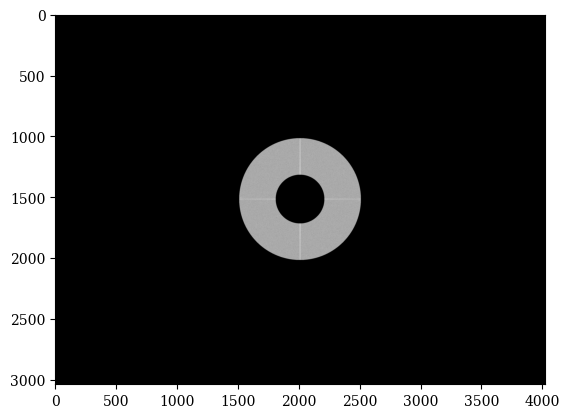

In [11]:
magnitude_spectrum = np.abs(f_shift)
phase_spectrum = np.angle(f_shift)
log_magnitude_spectrum = np.log(1 + magnitude_spectrum)
plt.imshow(set_center_zero2(log_magnitude_spectrum, 200,500), cmap='gray')

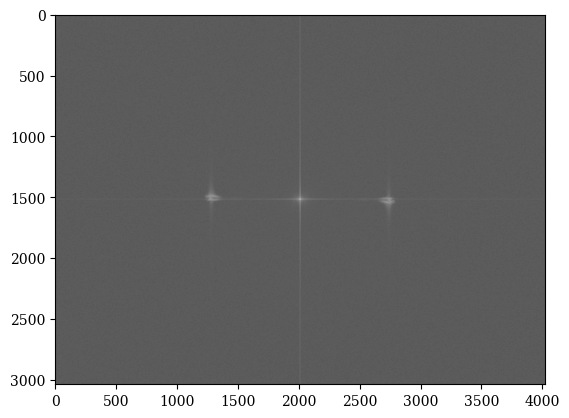

In [10]:
plt.imshow(log_magnitude, cmap='gray')

In [12]:
log_magnitude.mean()


8.234869117947747

C:\Users\86158\AppData\Local\Temp\ipykernel_6840\2726336965.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.abs(f_shift2.astype(np.uint8)), cmap='gray')


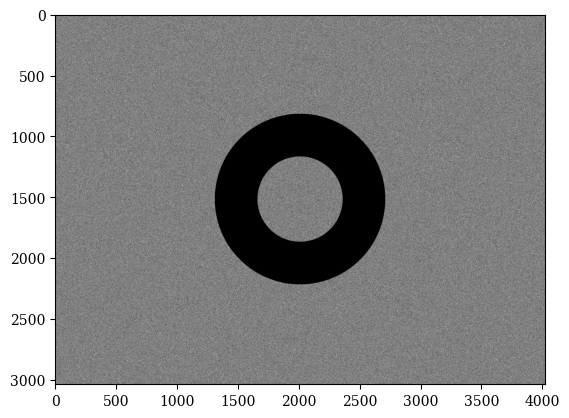

In [8]:
log_magnitude2 = set_center_zero2(log_magnitude, 350,700)
f_shift2 = np.zeros_like(f_shift)
f_shift2[log_magnitude2 == 0] = f_shift[log_magnitude2 == 0]

plt.imshow(np.abs(f_shift2.astype(np.uint8)), cmap='gray')
f_ishift2 = np.fft.ifftshift(f_shift2)
x_2 = np.abs(np.fft.ifft2(f_ishift2)).astype('uint8')
rebuild_image = Image.fromarray(x_2)
# rebuild_image.save(f"{fname}withr={200}{500}.png")

In [ ]:
f_shift = set_center_zero(f_shift, 350, out=False)

In [11]:
f_shift = set_center_zero(f_shift, 200, out=True)
# f_shift = set_center_zero(f_shift, 500, out=True)

f_ishift = np.fft.ifftshift(f_shift)
x_ = np.abs(np.fft.ifft2(f_ishift)).astype('uint8')
rebuild_image = Image.fromarray(x_)
rebuild_image.save(f"{fname}withr={200}{500}.png")

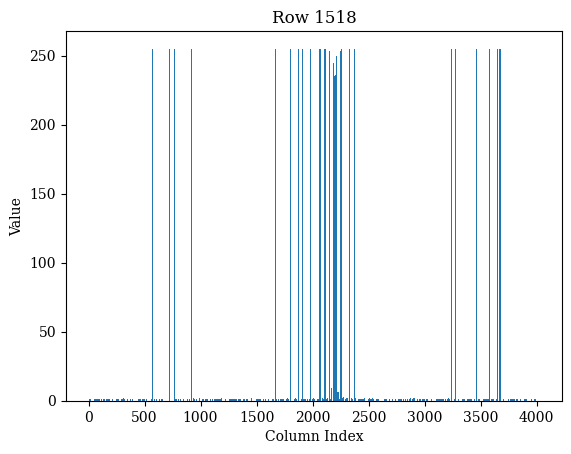

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# 打开图像文件
image = Image.open('images/222.png').convert('L')
image = np.array(image, dtype=np.uint8)
x_2 = np.array(x_2, dtype=np.uint8)
image = image - x_2
# image = np.array(image, dtype=np.uint8)
# 获取图像的宽度和高度
width, height = image.shape
row_number = 1518
row_data = image[row_number, :]
plt.bar(range(len(row_data)), row_data, width=1.0)
plt.title(f'Row {row_number}')
plt.xlabel('Column Index')
plt.ylabel('Value')
# 显示图形
plt.show()